In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\Gauri Mohite\\Documents\\Poject(stat sir)\Loan_prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
a= pd.crosstab(df['Credit_History'],df['Loan_Status'],margins=True)
a

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


# Data Visualization

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

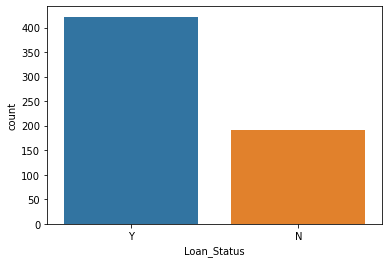

In [7]:
sns.countplot(x='Loan_Status',data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

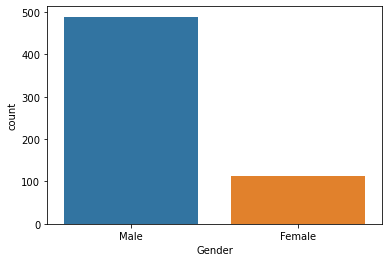

In [8]:
sns.countplot(x='Gender',data=df)

<AxesSubplot:xlabel='Education', ylabel='count'>

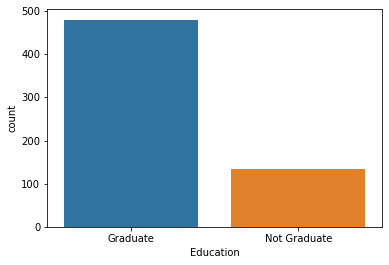

In [9]:
sns.countplot(x='Education',data=df)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

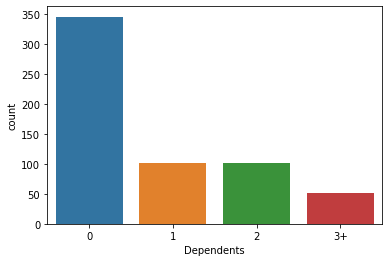

In [10]:
sns.countplot(x='Dependents',data=df)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

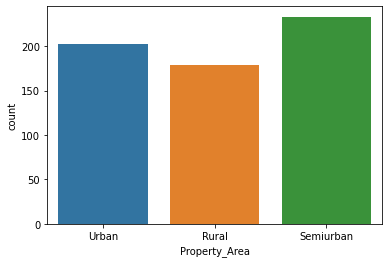

In [11]:
sns.countplot(x='Property_Area',data=df)

<AxesSubplot:xlabel='Married', ylabel='count'>

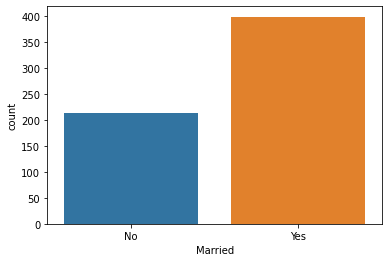

In [12]:
sns.countplot(x='Married',data=df)

<AxesSubplot:>

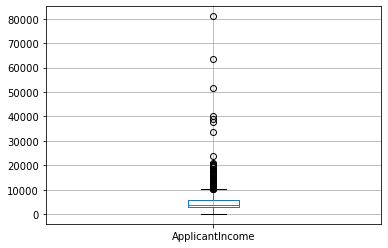

In [13]:
df.boxplot(column='ApplicantIncome')

<AxesSubplot:>

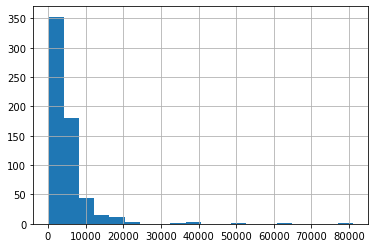

In [14]:
df['ApplicantIncome'].hist(bins=20)

<AxesSubplot:>

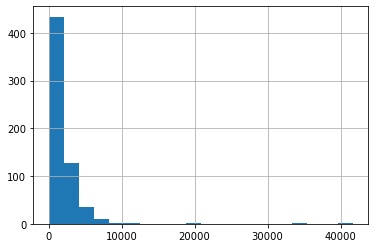

In [15]:
df['CoapplicantIncome'].hist(bins=20)

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

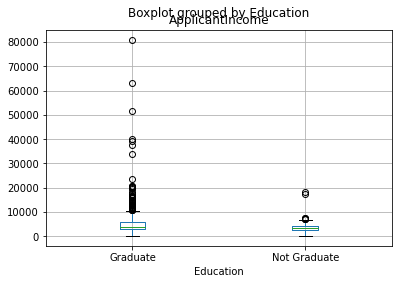

In [16]:
df.boxplot(column='ApplicantIncome',by='Education')

<AxesSubplot:>

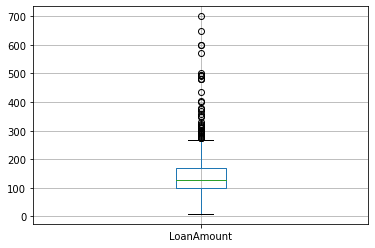

In [17]:
 df.boxplot(column='LoanAmount')

<AxesSubplot:>

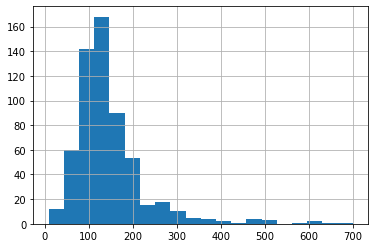

In [18]:
df['LoanAmount'].hist(bins=20)

<AxesSubplot:>

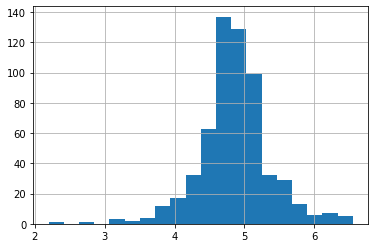

In [19]:
# Normalization
df['LoanAmount_log']=np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

In [20]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

In [21]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

In [22]:
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

In [23]:
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

In [24]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

In [25]:
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)
df['LoanAmount_log'].fillna(df['LoanAmount_log'].median(),inplace=True)

In [26]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [27]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [28]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

In [29]:
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']
df['TotalIncome_log']=np.log(df['TotalIncome'])

<AxesSubplot:>

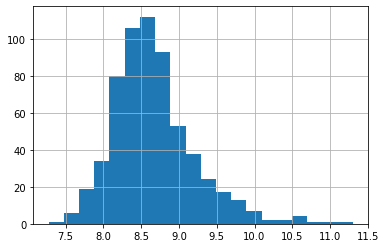

In [30]:
df['TotalIncome_log'].hist(bins=20)

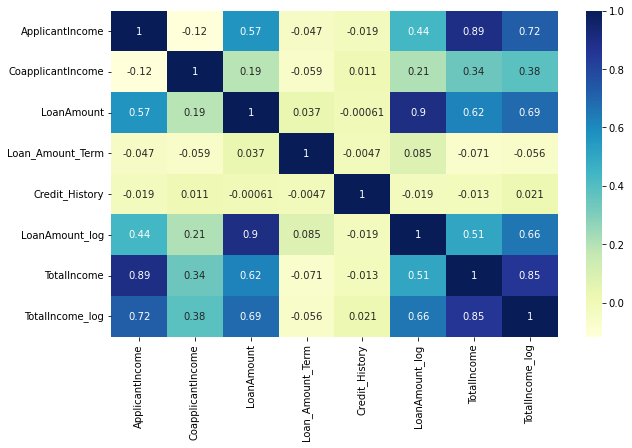

In [31]:
plt.figure(figsize=(10,6))
Hplt = sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)

In [32]:
df["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [33]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,4.852030,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [34]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [35]:
df= df.replace(to_replace='3+',value=4)

In [36]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Gender']= le.fit_transform(df['Gender'])
df['Married']=le.fit_transform(df['Married'])
df['Self_Employed']=le.fit_transform(df['Self_Employed'])
df['Education']= le.fit_transform(df['Education'])
df['Loan_Status']= le.fit_transform(df['Loan_Status'])
df['Property_Area']= le.fit_transform(df['Property_Area'])

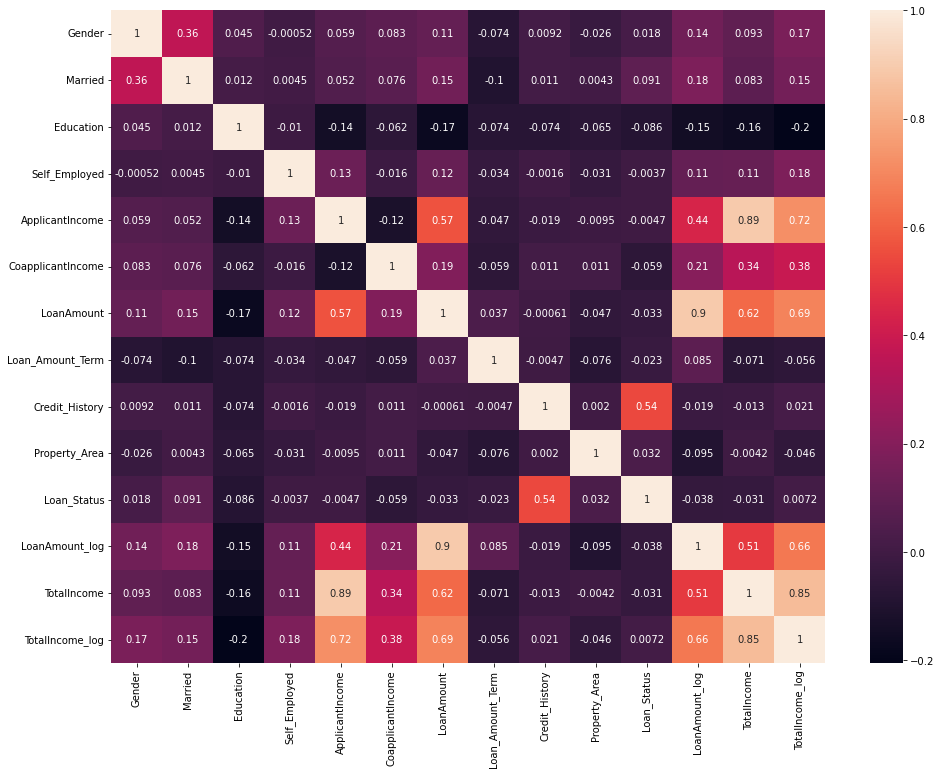

In [38]:
plt.figure(figsize=(16,12))
Hplt = sns.heatmap(df.corr(),annot=True)

In [39]:
X = df.drop(["Loan_Status","Loan_ID"],axis="columns")
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,4.852030,5849.0,8.674026
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,4.852030,6091.0,8.714568
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,4.189655,3000.0,8.006368
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,4.787492,4941.0,8.505323
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,4.948760,6000.0,8.699515


In [40]:
y = df["Loan_Status"]
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [41]:
#!pip install imblearn

In [42]:
from imblearn.under_sampling import RandomUnderSampler
RUS = RandomUnderSampler(random_state=0)

In [43]:
X_resampled, y_resampled = RUS.fit_resample(X,y)

In [44]:
X_resampled.shape

(384, 14)

In [45]:
y_resampled.shape

(384,)

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.2)

In [47]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model.fit(X_train,y_train)

C:\Users\Gauri Mohite\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [48]:
model.predict(X_test)

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0])

In [49]:
model.score(X_test,y_test)

0.6493506493506493

In [50]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

SVC()

In [51]:
model.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [52]:
model.score(X_test,y_test)

0.5064935064935064

In [53]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [54]:
model.predict(X_test)

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1])

In [55]:
model.score(X_test,y_test)

0.5974025974025974

In [56]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [57]:
model.predict(X_test)

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1])

In [58]:
model.score(X_test,y_test)

0.7272727272727273

In [59]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)

KNeighborsClassifier()

In [60]:
model.predict(X_test)

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0])

In [61]:
model.score(X_test,y_test)

0.5324675324675324

In [62]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [63]:
model.predict(X_test)

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [64]:
model.score(X_test,y_test)

0.6493506493506493

# Method: 2 - Use GridSearchCV

In [65]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [66]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {'C':[1,10,20,30],
               'kernel':['rbf','poly','linear']}},
    
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {'n_estimators':[1,5,10,20]}},
    
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {'C':[1,5,10,20]}},
}

In [ ]:
from sklearn.model_selection import GridSearchCV

score = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_resampled,y_resampled)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df = pd.DataFrame(scores, columns=['model','best_score','best_params'])
df

In [ ]:
model_params = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {'n_neighbors':[5,7,8,9],
                 'weights':['uniform', 'distance'],
                 'p': [2,4,6,8]}},
    
    'decision_tree':{
        'model': DecisionTreeClassifier(max_features='auto'),
        'params': {'criterion': ["gini", "entropy", "log_loss"]}},
    
     'naive_bayes': {
        'model': GaussianNB(priors=None)}
}

In [ ]:
from sklearn.model_selection import GridSearchCV

score = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_resampled,y_resampled)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df = pd.DataFrame(scores, columns=['model','best_score','best_params'])
df